# Atividade 02 - Zeros de Funções Reais

Nome completo: Marcelo Augusto de Barros Araújo.

Data: 23/04/25.

# Introdução

O presente trabalho apresenta o relatório da implementação computacional de diferentes técnicas numéricas estudadas na disciplina de Cálculo Numérico, lecionada às turmas de engenharia da Unidade Acadêmica de Belo Jardim. Utiliza-se a linguagem Python para a implementação dos algoritmos e considera-se a função

$$
f(x) = x \cdot e^{(-x - 1)} - 2 \cdot e^{(-3)}
$$


In [ ]:
import math as m
import numpy as np

# defina aqui a sua função
def f(x):
  return x*np.exp(-x-1)-2*np.exp(-3)

# Estudo do sinal da função

A função $f(x) = x \cdot e^{(-x - 1)} - 2 \cdot e^{(-3)}$ possui pelo menos um zero no intervalo $(a,b)$ uma vez que $f(a) = ≈−0.14023$, $f(b) = ≈+0.02156$, de modo que a função troca de sinal no intervalo considerado.

Calculando-se a derivada da função obtem-se

$$f'(x) = (1 - x)\,e^{-x-1}$$

Verifica-se que $f'(x)>0 \, (ou <0)$ para todo $x\in(a,b)$. Portanto, como a derivada não troca de sinal em $(a,b)$, existe um único zero para $f(x)$ neste intervalo.

O intervalo $(a,b)$ será utilizada para todos os métodos numéricos a serem implementados, a fim de comparação de eficiência entre os métodos.



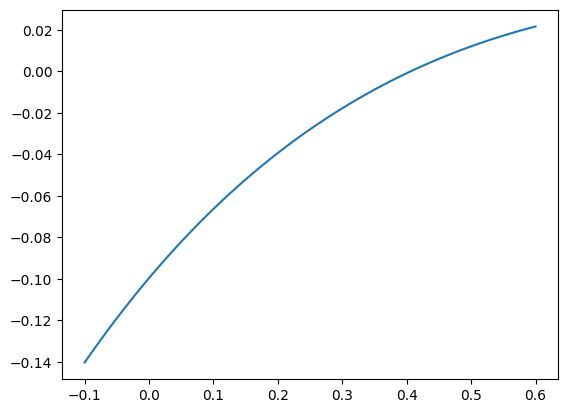

In [ ]:
#Plote o gráfico da função caso ache conveniente para a análise do sinal da função.
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(-0.1, 0.6, 100)
y = f(x)

plt.plot(x,y)
plt.show()

In [ ]:
# defina o intervalo
a0 = -0.1
b0 = 0.6

Para todos os os métodos a serem implementados e comparados, será considerada a precisão $ɛ=0.00009$ de quatro casas decimais, como segue:

In [ ]:
# precisão
e = 0.00009

# Método da Bissecção  

"""  
O método da bissecção é utilizado para encontrar raízes de uma função contínua em um intervalo [a, b] onde a função troca de sinal (f(a) e f(b) têm sinais opostos).  
O algoritmo segue os passos:  
1. Calcula o ponto médio M = (a + b)/2.  
2. Verifica em qual subintervalo ([a, M] ou [M, b]) a função muda de sinal.  
3. Atualiza o intervalo substituindo a ou b por M, mantendo a raiz dentro do novo intervalo.  
4. Repete os passos até que a largura do intervalo (b - a) seja menor que a precisão ε desejada.  
5. Retorna o ponto médio final como aproximação da raiz e o número de iterações realizadas.  
"""  

In [ ]:
# Implemente aqui o algoritmo do método da bissecção usando a sua função, o intervalo (a,b) e a precisão considera.
# Obtenha sempre o número de iterações necessárias à convergência a fim de comparação entre os métodos.
# k contabiliza as interações
a = a0
b = b0

k = 0
while b-a > e:
  M = (a+b)/2

  if f(a) * f(M) < 0:
    b = M
  else:
    a = M

  k = k+1



print('A solução encontrada foi: ', M)
print('O número de iterações foi: ', k)


A solução encontrada foi:  0.40645751953125
O número de iterações foi:  13


# Método da Posição Falsa
"""
O método da posição falsa é um algoritmo numérico para encontrar raízes de funções contínuas que combina:
- A garantia de convergência do método da bisseção
- A velocidade da interpolação linear

Funcionamento básico:
1. Requer uma função contínua f(x) com troca de sinal no intervalo [a,b]
2. Em cada iteração, calcula uma nova estimativa x* usando interpolação linear
3. Atualiza o intervalo mantendo o enquadramento da raiz
4. Repete até atingir a precisão desejada



In [ ]:
# Implemente aqui o algoritmo do método da posição usando a sua função, o intervalo (a,b) incial e a precisão considera.
# Obtenha sempre o número de iterações necessárias à convergência a fim de comparação entre os métodos.
a = a0
b = b0

it_max = 100 #máximo de iterações

for k in range(1, it_max +1):
  M = (a*f(b) - b*f(a))/ (f(b) - f(a)) #calcula média ponderada

  if f(a)*f(M) < 0:
    b= M
  else:
    a = M

  #critério de parada
  if abs(f(M))<e:
   break

print("A solução encontrada foi: ", M) #imprime a raiz
print("O número de iterações foi: ",k) #imprime iterações

# m = (a+b)/2 #ponto médio

# while abs(f(m) > e): #enquanto o intervalo for maior que a precisão
#   m = (a*f(b) - b*f(a))/ (f(b) - f(a)) #calcula o ponto médio
#   if f(a)*f(m) < 0: #se o produto for menor que 0, a raiz está no intervalo [a,m]
#     b = m #atualiza o intervalo
#   else: #se não, a raiz está no intervalo [m,b]
#     a = m #atualiza o intervalo
#   k = k + 1 #atualiza o número de iterações

# print("A raiz encontrada foi: ", m) #imprime a raiz
# print("O número de iterações foi: ",k) #imprime o número de iterações

A solução encontrada foi:  0.4069712090211097
O número de iterações foi:  8


# Método do Ponto Fixo  

O método do ponto fixo consiste em obter uma função de iteração $\phi(x)$ a partir da equação $f(x) = 0$.  

Supondo que a função de iteração é convergente, usa-se uma condição inicial $x_0 \in (a,b)$ e executa a rotina  
$$x_{k+1} = \phi(x_k)$$  
até que $|f(x_k)| < \epsilon$, onde $\epsilon$ é a precisão indicada.  

Para verificar se a função de iteração é convergente, resolvemos a inequação modular  
$$|\phi'(x)| < 1$$  
e verificamos a intersecção do intervalo obtido nesta inequação com o intervalo inicial $(a,b)$. A condição inicial $x_0$ deve estar nesta intersecção.  

---

### Para a função dada $f(x) = x e^{-x-1} - 2e^{-3}$, obtemos **duas funções de iteração**:

#### **Primeira função de iteração ($\phi_1$):**  
Reorganizando $x e^{-x-1} = 2e^{-3}$ para isolar $x$:  
$$
\phi_1(x) = 2e^{x - 2}
$$  

**Derivada:**  
$$
\phi_1'(x) = 2e^{x - 2}
$$  

**Condição de convergência $|\phi_1'(x)| < 1$:**  
$$
2e^{x - 2} < 1 \quad \Rightarrow \quad e^{x - 2} < \frac{1}{2} \quad \Rightarrow \quad x < 2 - \ln(2) \approx 1.3069
$$  

**Intervalo de convergência:**  
$$
x \in (-\infty, 2 - \ln 2) \approx (-\infty, 1.3069)
$$  

---

#### **Segunda função de iteração ($\phi_2$):**  
Reorganizando $x e^{-x-1} = 2e^{-3}$ aplicando logaritmo:  
$$
\phi_2(x) = 2 + \ln\left(\frac{x}{2}\right)
$$  

**Derivada:**  
$$
\phi_2'(x) = \frac{1}{x}
$$  

**Condição de convergência $|\phi_2'(x)| < 1$:**  
$$
\left|\frac{1}{x}\right| < 1 \quad \Rightarrow \quad |x| > 1
$$  

**Intervalo de convergência (considerando $x > 0$):**  
$$
x \in (1, +\infty)
$$  

---

### Conclusão sobre convergência:  
1. **Para $\phi_1(x)$:**  
   - O intervalo de convergência é $(-\infty, 1.3069)$.  
   - A raiz de $f(x) = 0$ está em $x \approx 0.406$, **dentro do intervalo de convergência**.  
   - **Portanto, $\phi_1(x)$ é convergente** para essa raiz se $x_0 \in (-\infty, 1.3069)$.  

2. **Para $\phi_2(x)$:**  
   - O intervalo de convergência é $(1, +\infty)$.  
   - A raiz $x \approx 0.406$ está **fora do intervalo de convergência**.  
   - **Portanto, $\phi_2(x)$ não é convergente** para essa raiz.  

---

### Observação:  
A função de iteração **$\phi_1(x) = 2e^{x-2}$ é convergente** e foi o utilizado o $phi$ escolhido para o algoritmo implementado abaixo.

In [ ]:
# Implemente aqui o algoritmo do método do ponto fixo usando a sua função,
# tomando uma condição inicial no intervalo (a,b) inicial, use a média do intervalo, e a precisão considera.
# Obtenha sempre o número de iterações necessárias à convergência a fim de comparação entre os métodos.
import numpy as np

def phi(x):
  return 2*(np.exp(x-2))

x0 = (a0+b0)/2 #ponto inicial do método
x_k = x0

it_max_ponto_fixo = 100 #máximo de iterações

for k in range(1, it_max_ponto_fixo+1):
  print(x_k)
  x_k = phi(x_k)

  if abs(f(x_k))< e:
    break

print("A solução encontrada foi: ", x_k) #imprime a raiz
print("O número de iterações foi: ",k) #imprime iterações



0.25
0.3475478869008903
0.3831591148739428
0.39704974472663346
0.4026034990371789
0.40484568045456765
0.4057544363332435
A solução encontrada foi:  0.4061233356568871
O número de iterações foi:  7


# Método de Newton  

O método de Newton é um caso especial do método do ponto fixo que consiste em usar a função de iteração  
$$
\phi(x_k) = x_k - \dfrac{f(x_k)}{f'(x_k)}  
$$  

Este método é convergente se $f'(x) \neq 0$ e $f''(x)$ existir e for contínua em $(a,b)$. Verificando, observamos que:  

**Primeira derivada:**  
Para $f(x) = x e^{-x-1} - 2e^{-3}$, aplicamos a regra do produto:  
$$
f'(x) = e^{-x-1}(1 - x)  
$$  

**Segunda derivada:**  
Derivando $f'(x)$ novamente:  
$$
f''(x) = e^{-x-1}(x - 2)  
$$  

---

### Verificação das condições de convergência:  
1. **$f'(x) \neq 0$:**  
   - $f'(x) = 0 \Rightarrow e^{-x-1}(1 - x) = 0 \Rightarrow x = 1$ (pois $e^{-x-1} \neq 0$).  
   - A raiz desejada está próxima de $x \approx 0.406$, **fora do ponto crítico** $x = 1$.  

2. **$f''(x)$ existe e é contínua:**  
   - $f''(x) = e^{-x-1}(x - 2)$ é contínua em $\mathbb{R}$, pois envolve funções exponenciais e polinomiais contínuas.  

---

In [ ]:
# Implemente aqui o algoritmo do método de Newton usando a sua função,
# tomando uma condição inicial no intervalo (a,b) inicial, use a média do intervalo, e a precisão considera.
# Obtenha sempre o número de iterações necessárias à convergência a fim de comparação entre os métodos.
import numpy as np


# primeira derivada
def f_linha(x):
    return (1 - x) * np.exp(-x - 1)

x0 = (a0+b0)/2 #ponto inicial do método condição
x_k = x0

it_max_newton = 100 #máximo de iterações

for k in range(1, it_max_newton+1):
  print(x_k)
  x_k = x_k - f(x_k)/f_linha(x_k)

  #criterio de parada
  if abs(f(x_k))< e:
    break

print("A solução encontrada foi: ", x_k) #imprime a raiz
print("O número de iterações foi: ",k) #imprime iterações

0.25
0.3800638492011871
0.40548392044600173
A solução encontrada foi:  0.40637467390600285
O número de iterações foi:  3


# Método da Secante  

O método da secante é uma discretização do método de Newton que substitui a derivada $f'(x_k)$ por uma aproximação via diferenças finitas:  
$$
f'(x_k) \approx \dfrac{f(x_k) - f(x_{k-1})}{x_k - x_{k-1}}
$$  

Desta forma, as iterações são calculadas por:  
$$
x_{k+1} = \dfrac{x_{k-1} \cdot f(x_k) - x_k \cdot f(x_{k-1})}{f(x_k) - f(x_{k-1})}
$$  

---

### Condições para convergência:  
1. **$f(x)$ é contínua e suave** (pelo menos duas vezes diferenciável) em $(a,b)$.  
2. **As aproximações iniciais $x_0$ e $x_1$** devem estar próximas da raiz desejada.  

---

In [ ]:
# Implemente aqui o algoritmo do método da secante usando a sua função,
# tomando duas condições iniciais no intervalo (a,b) inicial, e a precisão considera.
# Obtenha sempre o número de iterações necessárias à convergência a fim de comparação entre os métodos.

#condições iniciais
x0 = 0
x1 = 0.3
x2 = (x0 +x1)/2

x_k = x0

it_max_secante = 100 #máximo de iterações

for k in range(1, it_max_secante+1):
  print(x2)
  x2 = (x0 * f(x1) - x1 * f(x0)) / (f(x1) - f(x0))
  x0 = x1
  x1 = x2


  #criterio de parada
  if abs(f(x2))< e:
    break

print("A solução encontrada foi: ", x2) #imprime a raiz
print("O número de iterações foi: ",k) #imprime iterações

0.15
0.36536704810546927
0.4011375263569089
A solução encontrada foi:  0.4060977153664015
O número de iterações foi:  3


# Resultados e Discussões  

Dentre os resultados obtidos, verificou-se que o método **de Newton** e o **método da secante** apresentaram melhor eficiência com base no número de iterações, como pode ser visto na tabela a seguir:  

<table>
  <thead>
    <tr>
      <th>Método</th>
      <th>Raiz</th>
      <th>Número de Iterações</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>Bissecção</td>
      <td>0.40645751953125</td>
      <td>13</td>
    </tr>
    <tr>
      <td>Ponto Falso</td>
      <td>0.4069712090211097</td>
      <td>8</td>
    </tr>
    <tr>
      <td>Ponto Fixo</td>
      <td>0.4061233356568871</td>
      <td>7</td>
    </tr>
    <tr>
      <td>Método de Newton</td>
      <td>0.40637467390600285</td>
      <td>3</td>
    </tr>
    <tr>
      <td>Método da Secante</td>
      <td>0.4060977153664015</td>
      <td>3</td>
    </tr>
  </tbody>
</table>

---

### Análise dos Resultados:  

1. **Método do Ponto Fixo:**  
   - **Apresentou convergência** para a função de iteração $\phi_1(x) = 2e^{x-2}$, pois a raiz $x \approx 0.406$ está dentro do intervalo de convergência $(-\infty, 1.3069)$.  
   - **Dificuldades:**  
     - A escolha da função de iteração $\phi(x)$ é crítica. A segunda tentativa, $\phi_2(x) = 2 + \ln(x/2)$, não convergiria para a raiz desejada, pois seu intervalo de convergência é $(1, +\infty)$.  
     - Garantir que $|\phi'(x)| < 1$ na vizinhança da raiz exigiu análise prévia das derivadas.  

2. **Método de Newton:**  
   - **Convergência mais rápida** (3 iterações), conforme esperado devido à sua ordem quadrática.  
   - **Dificuldades:**  
     - Requer o cálculo de $f'(x)$, que se anula em $x = 1$. Se a raiz estivesse próxima desse ponto, o método falharia.  
     - A escolha de $x_0$ muito distante da raiz poderia levar a divergência, mas isso não ocorreu com $x_0 = (a+b)/2$.  

3. **Método da Secante:**  
   - **Eficiência comparável ao de Newton** (3 iterações), mas sem exigir derivadas analíticas.  
   - **Dificuldades:**  
     - Risco de divisão por zero se $f(x_k) \approx f(x_{k-1})$.  
     - Sensibilidade à escolha das condições iniciais $x_0$ e $x_1$.  

4. **Método da Bissecção:**  
   - **Convergência lenta** (13 iterações), típica de métodos de ordem linear.  
   - **Vantagem:** Robustez garantida, independente da escolha do intervalo inicial $[a, b]$.  

5. **Método do Ponto Falso:**  
   - **Desempenho intermediário** (8 iterações), melhor que a bissecção, mas inferior aos métodos de ordem superior.  

---

### Conclusões Gerais:  
- **Métodos de ordem superior (Newton e Secante)** foram os mais eficientes, como previsto teoricamente.  
- **Método do Ponto Fixo** mostrou-se viável, mas dependente da escolha criteriosa de $\phi(x)$ e também da função $f(x)$.  
- **Dificuldades analíticas** destacaram-se na garantia das condições de convergência.    

**Observação final:** A escolha do método varia de função pra função, assim como o intervalo escolhido para encontra a raíz que deve ser bem próximo, mais para esse meu $f(x)$ os métodos mais eficientes foram o de Newton e o da Secante contendo uma pequena variação na quarta casa decimal depois da vírgula.